In [1]:
import numpy as np
import pandas as pd

#### HIGHEST AND LOWEST SCORE OF INNING

In [7]:
df = pd.read_csv("dlv.csv")
inning = df.groupby(["match_id","inning"])["total_runs"].sum().reset_index()

In [8]:
inning["total_runs"].max()

263

In [9]:
inning["total_runs"].min()

2

#### AVERAGE SCORE OF VIRAT KOHLI


In [10]:
kohli = df[df["batsman"] == "V Kohli"]

In [11]:
kohli.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2590,12,1,Royal Challengers Bangalore,Mumbai Indians,1,2,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
2591,12,1,Royal Challengers Bangalore,Mumbai Indians,1,3,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2593,12,1,Royal Challengers Bangalore,Mumbai Indians,1,5,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2594,12,1,Royal Challengers Bangalore,Mumbai Indians,1,6,V Kohli,CH Gayle,TG Southee,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2597,12,1,Royal Challengers Bangalore,Mumbai Indians,2,1,V Kohli,CH Gayle,Harbhajan Singh,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [15]:
kohli.groupby("match_id")["batsman_runs"].sum()

match_id
12      62
17      28
20      64
27       0
30      10
      ... 
624     75
626    113
632     54
633      0
636     54
Name: batsman_runs, Length: 141, dtype: int64

In [17]:
## for average mean
kohli.groupby("match_id")["batsman_runs"].sum().mean()

31.368794326241133

##### if a team scores 200 in first inning then what is the probability of their winning

In [18]:
df.groupby(["match_id","inning"])["total_runs"].sum().reset_index()

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
...,...,...,...
1279,634,2,140
1280,635,1,162
1281,635,2,163
1282,636,1,208


In [19]:
# store in a variable
match = df.groupby(["match_id","inning"])["total_runs"].sum().reset_index()

In [20]:
i1 = match[match["inning"] == 1]
i2 = match[match["inning"] == 2]

In [21]:
i1.head()

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157


In [22]:
i2.head()

,match_id,inning,total_runs
1,1,2,172
3,2,2,187
5,3,2,184
7,4,2,164
9,5,2,142


In [24]:
## true false output
i1["total_runs"] > 200

0        True
2       False
4       False
6       False
8       False
        ...  
1274    False
1276    False
1278    False
1280    False
1282     True
Name: total_runs, Length: 636, dtype: bool

In [25]:
i1 = i1[i1["total_runs"] > 200]

In [26]:
i1.head()

,match_id,inning,total_runs
0,1,1,207
16,9,1,205
38,20,1,213
62,32,1,207
72,36,1,209


In [27]:
## inner merge
pd.merge(i1,i2, on="match_id")

,match_id,inning_x,total_runs_x,inning_y,total_runs_y
0,1,1,207,2,172
1,9,1,205,2,108
2,20,1,213,2,192
3,32,1,207,2,181
4,36,1,209,2,161
5,41,1,208,2,214
6,44,1,212,2,66
7,50,1,230,2,223
8,60,1,222,2,82
9,61,1,240,2,207


In [29]:
match_200 = pd.merge(i1,i2, on="match_id")

In [30]:
len(match_200)

47

In [37]:
win = match_200[match_200["total_runs_x"] > match_200["total_runs_y"]]

In [38]:
len(win)

41

In [40]:
41/47

0.8723404255319149

##### to show mean and median value in histogram

In [41]:
## visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv("cars.csv")

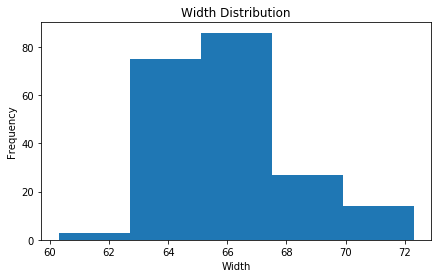

In [43]:
plt.figure(figsize=(7,4))
plt.hist(df["width"],bins=5)## shows distribution range of x axis is called bins


plt.title("Width Distribution")
plt.xlabel("Width")
plt.ylabel("Frequency")
plt.show()

In [44]:
width_mean = df["width"].mean()
width_median = df["width"].median()

In [46]:
width_mean

65.90780487804875

In [47]:
width_median

65.5

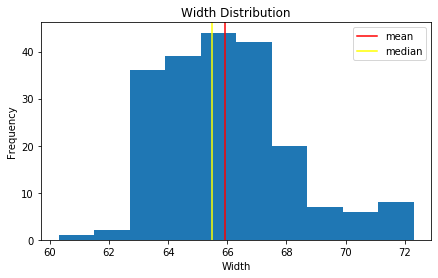

In [51]:
plt.figure(figsize=(7,4))
plt.hist(df["width"],bins=10)## shows distribution range of x axis is called bins

plt.axvline(width_mean,color="red")
plt.axvline(width_median,color="yellow")

plt.legend(labels=["mean","median"])
plt.title("Width Distribution")
plt.xlabel("Width")
plt.ylabel("Frequency")
plt.show()

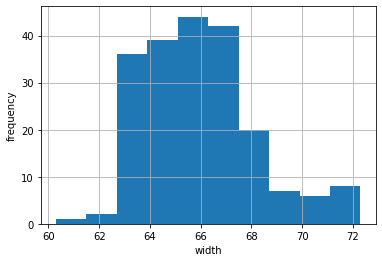

In [58]:
df["width"].hist()
plt.xlabel("width")
plt.ylabel("frequency")
plt.show()